## Processing data

### Process images

In [2]:
import os
from PIL import Image
import re

def read_images(folder_path):
    # List to store images
    images_list = []
    
    # Regular expression to extract numbers from the filename
    def numerical_sort(value):
        parts = re.compile(r'(\d+)').findall(value)
        return tuple(map(int, parts))
    
    # Get all file names in the folder and sort them by numerical value
    file_names = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')], key=numerical_sort)
    
    # Loop through sorted file names
    for file_name in file_names:
        # Create the full path to the image
        file_path = os.path.join(folder_path, file_name)
        
        # Open and read the image
        image = Image.open(file_path)
        
        # Append the image to the list
        images_list.append(image)
        
    return images_list

# Specify the path to your folder
folder_path = '/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/images'
images = read_images(folder_path)

# Now 'images' is a list containing all the images as Pillow Image objects, sorted numerically


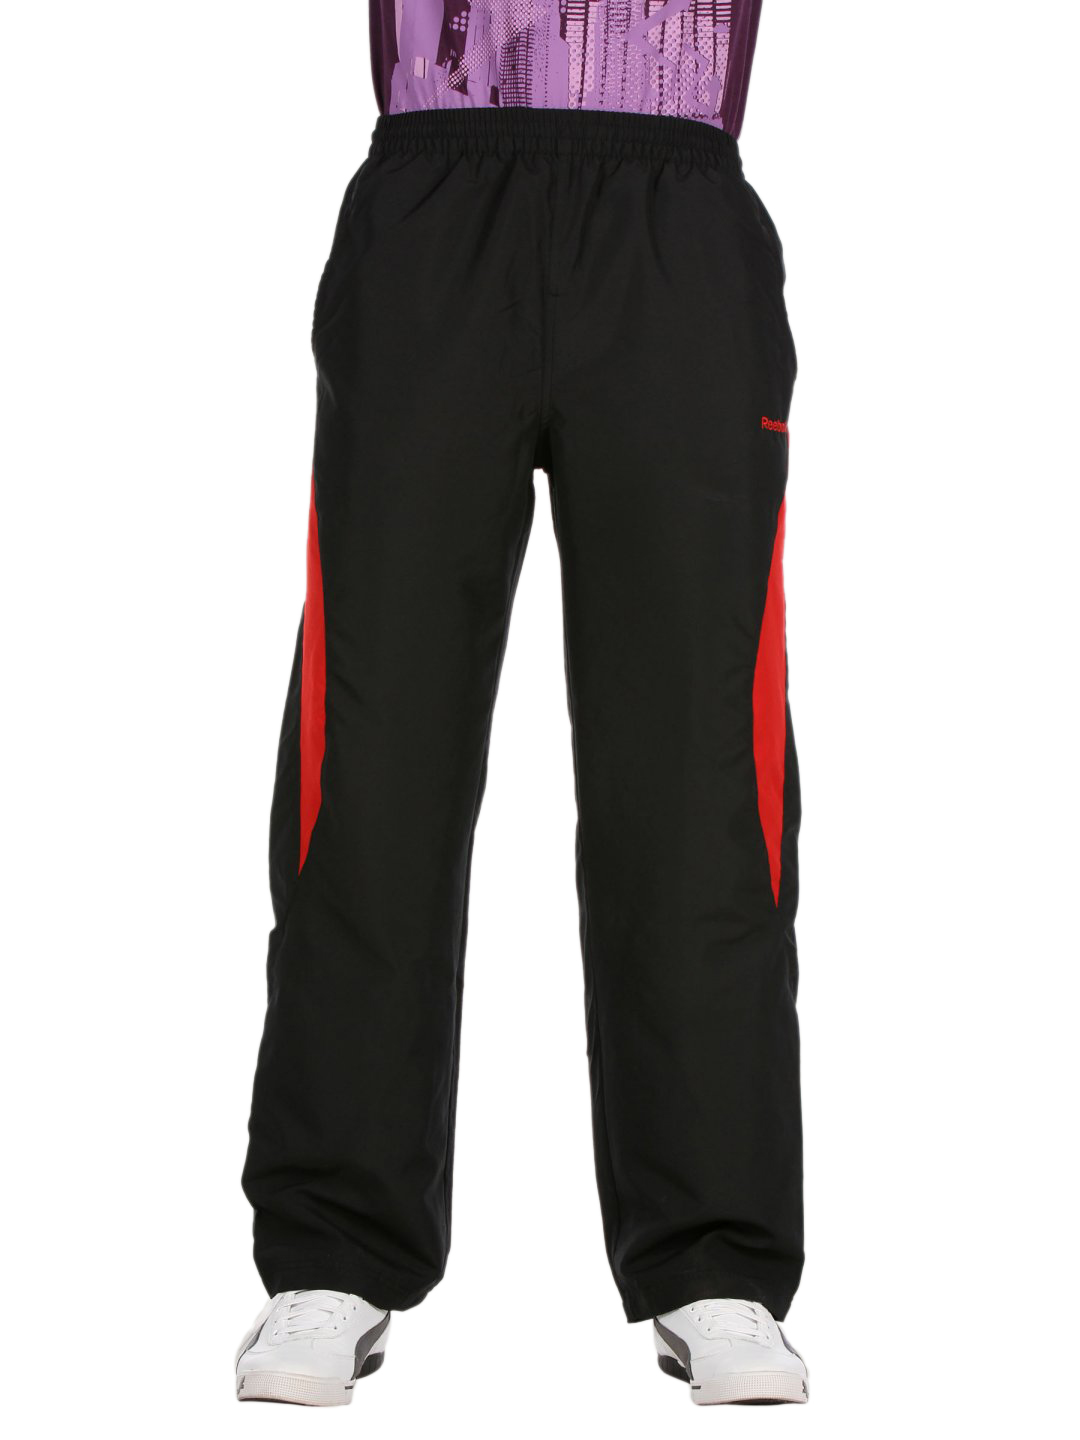

In [24]:
images[1]

In [14]:
import clip
import numpy as np
import torch
from torch.nn.parallel import DataParallel

# Load the CLIP model and processor
model, processor = clip.load("ViT-L/14", device='cuda')

# Assuming 'images' is a list containing images loaded using Pillow
imgl = images[4000:]

# Process and encode the images using the CLIP processor
img_tensors = [processor(image).unsqueeze(0) for image in imgl]

# Stack the image tensors into a single tensor
img_input = torch.cat(img_tensors, dim=0).to('cuda')

# Generate image embeddings
with torch.no_grad():
    image_vecs = model.encode_image(img_input).detach().cpu().numpy()

# Convert NumPy array to a list of lists
image_vecs3 = image_vecs.tolist()




In [13]:
# Assuming image_vecs_list is your list of lists
num_rows = len(image_vecs2 )
num_cols = len(image_vecs2[0]) if image_vecs2 else 0

print("Number of rows (images):", num_rows)
print("Number of columns (features per image):", num_cols)

Number of rows (images): 2000
Number of columns (features per image): 768


In [15]:
combined_image_vecs = np.concatenate((image_vecs1, image_vecs2, image_vecs3), axis=0)

In [19]:
combined_image_vecs = combined_image_vecs.tolist()

In [20]:
# Assuming image_vecs_list is your list of lists
num_rows = len(combined_image_vecs )
num_cols = len(combined_image_vecs[0]) if combined_image_vecs else 0

print("Number of rows (images):", num_rows)
print("Number of columns (features per image):", num_cols)

Number of rows (images): 5964
Number of columns (features per image): 768


#### Save encoded images vectors

In [21]:
import numpy as np
# Optionally, save all arrays in one file using .npz format
np.savez("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/images_vecs.npz", all_features=combined_image_vecs)
print("Saved all features in one file")


Saved all features in one file


In [24]:
data = np.load("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/images_vecs.npz")

# npz_file is a NpzFile object which behaves like a dictionary.
loaded_images = data['all_features']
loaded_images = loaded_images.tolist()

In [ ]:
loaded_images[0]

### Process Texts

In [26]:
import json

def extract_gpt_conversation_values(json_file_path):
    # List to store "value" fields where "from" is "gpt"
    gpt_values = []
    
    # Open the JSON file and load its content
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Loop through each element in the JSON data
    for item in data:
        # Loop through each conversation in the "conversations" list
        for conversation in item['conversations']:
            # Check if the "from" key is "gpt"
            if conversation['from'] == 'gpt':
                # Extract the "value" and append it to the list
                gpt_values.append(conversation['value'].strip())
    
    return gpt_values

# Specify the path to your JSON file
json_file_path = '/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/filtered_data.json'
values = extract_gpt_conversation_values(json_file_path)

# 'values' is now a list containing all the extracted "value" strings from "gpt" conversations


In [27]:
values[0]

'Black and gray nylon warm-up pants with white piping.'

In [28]:
import clip
import torch

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device)

def encode_strings_with_clip(strings):
    # Convert list of strings into a batch of text descriptions
    text_inputs = torch.cat([clip.tokenize(s) for s in strings]).to(device)
    
    # Calculate features
    with torch.no_grad():
        text_features = model.encode_text(text_inputs).detach().cpu().numpy()
    

    return text_features

# Example usage
encoded_features = encode_strings_with_clip(values)
# Convert NumPy array to a list of lists
encoded_features = encoded_features.tolist()






In [ ]:
encoded_features[:2]

#### Save encoded text

In [30]:
import numpy as np
# Optionally, save all arrays in one file using .npz format
np.savez("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/text_vecs.npz", all_features=encoded_features)
print("Saved all features in one file")


Saved all features in one file


In [31]:
data = np.load("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/text_vecs.npz")

# npz_file is a NpzFile object which behaves like a dictionary.
loaded_text = data['all_features']
loaded_text = loaded_text.tolist()

In [33]:
loaded_text[:2]

[[0.3583984375,
  0.4970703125,
  -0.25927734375,
  -0.00943756103515625,
  0.33251953125,
  0.1302490234375,
  -0.0780029296875,
  -0.082763671875,
  -0.5517578125,
  0.3876953125,
  -0.02777099609375,
  0.326416015625,
  0.6572265625,
  -0.379638671875,
  0.1923828125,
  0.03607177734375,
  -0.2430419921875,
  -0.03662109375,
  0.018951416015625,
  -0.02349853515625,
  0.53564453125,
  -0.2181396484375,
  -0.5263671875,
  -0.1458740234375,
  -0.75146484375,
  -0.498779296875,
  -0.029083251953125,
  -0.8662109375,
  1.0283203125,
  -0.326416015625,
  0.73779296875,
  0.2249755859375,
  -0.12939453125,
  -0.2294921875,
  0.1781005859375,
  0.251953125,
  -0.061859130859375,
  0.06787109375,
  -0.27294921875,
  -0.050262451171875,
  -0.37744140625,
  0.0657958984375,
  0.5810546875,
  0.473876953125,
  -0.955078125,
  -0.01061248779296875,
  0.10546875,
  -0.1824951171875,
  -0.533203125,
  -1.1484375,
  0.26318359375,
  -0.572265625,
  -0.259765625,
  0.34423828125,
  0.59716796875,
 

In [33]:
len(encoded_features[0])

768

#### Load URLS

In [34]:
import pandas as pd
df = pd.read_csv("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/images_links.csv")

In [35]:
# Sorting the DataFrame by extracting numbers from the 'filename' column
df['numeric_filename'] = df['filename'].str.extract('(\d+)').astype(int)
df.sort_values('numeric_filename', inplace=True)
df.drop('numeric_filename', axis=1, inplace=True)  # Optional: remove the auxiliary column

print(df)

       filename                                               link
631    1607.jpg  http://assets.myntassets.com/v1/images/style/p...
2833   1608.jpg  http://assets.myntassets.com/v1/images/style/p...
1025   1609.jpg  http://assets.myntassets.com/v1/images/style/p...
1258   1636.jpg  http://assets.myntassets.com/v1/images/style/p...
3059   1637.jpg  http://assets.myntassets.com/v1/images/style/p...
...         ...                                                ...
3361  59896.jpg  http://assets.myntassets.com/v1/images/style/p...
862   59897.jpg  http://assets.myntassets.com/v1/images/style/p...
3821  59898.jpg  http://assets.myntassets.com/v1/images/style/p...
5688  59943.jpg  http://assets.myntassets.com/v1/images/style/p...
5624  59988.jpg  http://assets.myntassets.com/v1/images/style/p...

[5964 rows x 2 columns]


In [36]:
urls_list = df['link'].tolist()

In [37]:
urls_list

['http://assets.myntassets.com/v1/images/style/properties/b9828d5eb23f75d6cb4ba5a66f292b83_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/7e926cb094cf06c4d7bd2196b5b25bb8_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/7b661983ddd630db69f2847a53e25704_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/7c80fca789c5c1863a4080d7ed57acf0_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/0ac13b20762f7542baadcb2472855437_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/332172e96e45f1a6d5ba979215736176_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/349e9cdd07258c3f4254065dcad69c3e_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/271493f761fcb4583542bad929fb3d99_images.jpg',
 'http://assets.myntassets.com/v1/images/style/properties/Nike-Men-Blue-Windrunner-Jacket_157715f98badcdedb27fbc8deb5d3c3a_images.jpg',
 'http://assets.myntassets.com/v

#### Save URLS

In [38]:
import numpy as np
# Optionally, save all arrays in one file using .npz format
np.savez("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/urls.npz", all_features=urls_list)
print("Saved all features in one file")

Saved all features in one file


In [40]:
data = np.load("/media/akoubaa/new_ssd/naseif/Desktop/capstone/data/urls.npz")

# npz_file is a NpzFile object which behaves like a dictionary.
loaded_urls = data['all_features']
loaded_urls = loaded_urls.tolist()

In [41]:
loaded_urls[0]

'http://assets.myntassets.com/v1/images/style/properties/b9828d5eb23f75d6cb4ba5a66f292b83_images.jpg'

### Create Database

In [49]:
import chromadb
import numpy as np
from PIL import Image
import os
import json
import torch



def vector_database_generator(txt_vecs, images_vecs, URLs,
                              txt_data_ids, images_data_ids, image_list,
                              collection_name,
                              txt_meta , image_meta 
                              ):
    """
    txt_vecs: is the list of text vectors
    images_vecs: is the list of images vectors
    URLs: is the list of the directory of the data
    txt_data_ids: is a list with same lingth as the txt_vecs list.
    it is used to give each element in txt_vecs a destinct id
    images_data_ids: is a list with same lingth as the images_vecs list.
    it is used to give each element in images_vecs a destinct id
    collection_name: is the name of the vector database
    txt_meta: if needed it labels the txt_vecs as a text type, True by defult
    txt_meta: if needed it labels the txt_vecs as an image type

    the function will return a generated vector data base consiste of
    to types of data which are:
     -the captions' vectors as an indvidual entitys
     -the images' vectors as an individual entitys
    """
    # create the vector data base
    client = chromadb.Client()

    collection = client.create_collection(
    name = collection_name
    )
    # store the vectors of the texts with the type labeling
    txt_meta_ls = []
    if txt_meta is True:
        for i in range(len(txt_vecs)):
            txt_meta_ls.append({'type':'text'})

        collection.add(
        ids=txt_data_ids,
        embeddings=txt_vecs,
        metadatas=txt_meta,
        uris=URLs,
        images=image_list,

        )
    # store the vectors of the texts without the type labeling
    else:
        collection.add(
        ids=txt_data_ids,
        embeddings=txt_vecs,
        uris=URLs,
        images=image_list
        )


    # store the vectors of the images with the type labeling
    img_meta = []
    if image_meta is True:
        for i in range(len(images_vecs)):
            img_meta.append({'type':'image'})
        
        collection.add(
        ids=images_data_ids,
        embeddings=images_vecs,
        metadatas=img_meta,
        uris=URLs,
        images=image_list
        )
    # store the vectors of the images without the type labeling
    else:
        collection.add(
        ids=images_data_ids,
        embeddings=images_vecs,
        uris=URLs,
        images=image_list    
        )
    
    return(collection)


In [55]:
# Creating a list of numbers from 1 to 5964
txt_data_ids = [str(i) for i in range(5965, 11929)]

images_data_ids = [str(i) for i in range(1, 5965)]




In [58]:
vector_database = vector_database_generator(txt_vecs = loaded_text, images_vecs = loaded_images, URLs = loaded_urls,
                              txt_data_ids=txt_data_ids, images_data_ids=images_data_ids, image_list= images,
                              collection_name="sml",
                              txt_meta = None, image_meta = None
                              )

In [74]:
import clip
import torch

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device)


def query(vector_database,
          user_text_input=None, 
          user_image_input=None,):
    """
    vector_data base: is the databse where you stored the vectors of you data
    user_text_input: is the textual query from the user.
    user_image_input: is the imagary query from the user.

    the function will return the directory of the result
    """
    
    # Calculate features
    text_input = clip.tokenize(user_text_input).to(device)
    with torch.no_grad():
        text_feature = model.encode_text(text_input).detach().cpu().numpy()
    text_feature = text_feature.tolist()
    txt_query_vec = text_feature
    

    # use the texual query
    if user_text_input is not None and user_image_input is None:
        result = vector_database.query(
        query_embeddings=txt_query_vec,
        include= ['distances','metadatas','uris'],
        n_results=5
        )
        return result
    # use the imagary query
    elif user_image_input is not None and user_text_input is None:
        result = vector_database.query(
        query_embeddings=image_vecs,
        include= ['distances','metadatas','uris'],
        n_results=5
        )
        return result['uris']
    # use the averege of both queries
    elif user_image_input is not None and user_text_input is not None:
        txt_vecs_np = np.array(txt_query_vec)
        img_vecs_np = np.array(image_vecs)
        av_vecs = ((txt_vecs_np + img_vecs_np)/2).tolist()
        result = vector_database.query(
        query_embeddings=av_vecs,
        include= ['distances','metadatas','uris'],
        n_results=5
        )
        return result['uris']   
    # if both queries are None  
    else:
        return None

In [75]:
results = query(vector_database=vector_database,
          user_text_input="flowers", 
          user_image_input=None,)

In [76]:
results

{'ids': [['11083', '11082', '10956', '10403', '10957']],
 'distances': [[154.71176147460938,
   163.724853515625,
   173.11126708984375,
   173.1929931640625,
   176.31239318847656]],
 'metadatas': [[None, None, None, None, None]],
 'embeddings': None,
 'documents': None,
 'uris': [['http://assets.myntassets.com/v1/images/style/properties/a63ad80266ac893a5bc2845d19337892_images.jpg',
   'http://assets.myntassets.com/v1/images/style/properties/2a8c4ad943736caa507e7a9ff5d5665e_images.jpg',
   'http://assets.myntassets.com/v1/images/style/properties/de79d341584312b09b3af7968b5146f4_images.jpg',
   'http://assets.myntassets.com/v1/images/style/properties/e3361edd25f563df9fbd726877dd413d_images.jpg',
   'http://assets.myntassets.com/v1/images/style/properties/fd15f517459fef4a7a8612ab36227950_images.jpg']],
 'data': None}

In [ ]:
import clip
import torch

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device)

def encode_string_with_clip(string):
    # Tokenize a single string
    text_input = clip.tokenize(string).to(device)
    
    # Calculate features
    with torch.no_grad():
        text_feature = model.encode_text(text_input).detach().cpu().numpy()

    text_feature = text_feature.tolist()


# Example usage
encoded_features = encode_strings_with_clip(user_text_input)
# Convert NumPy array to a list of lists
encoded_features = encoded_features.tolist()

In [1]:
import streamlit as st
from data_generator import database
from data_retriver import get_results
from chromadb.api.client import Client
import chromadb
from chromadb.api.client import Client

# Assuming you have already set up your client
client = chromadb.Client()

# Check if the collection exists
if "HUsaam" in client.list_collections():
    vectordb = client.get_collection("HUsaam")
else:
    vectordb = database("HUsaam")




In [5]:
if client.get_collection("HUsaam") is None:
    vectordb = database("HUsaam")
else:
    vectordb = client.get_collection("HUsaam")